# Imports 

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

# Loading the data 

In [2]:
student_data = pd.read_csv(r'student_data.csv')
student_data.head()

,Unnamed: 0.1,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
0,0,0,1,17,5,171,1,1,122.0,1,...,0,0,0.000000,0,10.8,1.4,1.74,0,85.185539,362200.0
1,1,1,1,15,1,9254,1,1,160.0,1,...,6,6,13.666667,0,13.9,-0.3,0.79,1,85.185539,362200.0
2,2,2,1,1,5,9070,1,1,122.0,1,...,0,0,0.000000,0,10.8,1.4,1.74,0,85.185539,362200.0
3,3,3,1,17,2,9773,1,1,122.0,1,...,10,5,12.400000,0,9.4,-0.8,-3.12,1,85.185539,362200.0
4,4,4,2,39,1,8014,0,1,100.0,1,...,6,6,13.000000,0,13.9,-0.3,0.79,1,85.185539,362200.0


In [3]:
student_data = student_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [4]:
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,0,85.185539,362200.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,1,85.185539,362200.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,0,85.185539,362200.0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,1,85.185539,362200.0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,1,85.185539,362200.0


# Train/ Test Split 

### Spilling the dataset into training and test 

In [5]:
# Split used: 70/30
X_train,X_test,y_train,y_test = train_test_split(student_data.drop(columns='Target'),student_data.Target,test_size=0.3,random_state=47)

In [6]:
X_train.shape, X_test.shape

((3096, 38), (1328, 38))

In [7]:
y_train.shape, y_test.shape

((3096,), (1328,))

### Training the model 

#### 1. Using random forest 

In [8]:
#imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [9]:
# Creating random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = rf.predict(X_test)

In [11]:
accuracy_RF = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_RF)

Accuracy Score: 0.7846385542168675


In [12]:
x_train_rf_pred = rf.predict(X_train)

In [13]:
# Training accuracy of Random Forest 
training_rf_ac = accuracy_score(y_train, x_train_rf_pred)

In [14]:
print("Training Accuracy:", training_rf_ac )

Training Accuracy: 1.0


In [15]:
x_test_rf_pred = rf.predict(X_test)

In [16]:
# Testing accuracy of Random Forest 
testing_rf_ac = accuracy_score(y_test, x_test_rf_pred)

In [17]:
print("Testing Accuracy:", testing_rf_ac)

Testing Accuracy: 0.7846385542168675


##### Optimizing accuracy using  RandomizedSearchCV

In [18]:
# Paramters 
param_randomforest = {'n_estimators':[50,80,100,120,150],
                      'max_depth':[2,4,6,8]}

In [19]:
# Creating random forest classifier
rf = RandomForestClassifier()

# Using random search to find best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_randomforest , 
                                 n_iter=5, 
                                 cv=5)

# Fitting the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [50, 80, 100, 120,
                                                         150]})

In [20]:
# Best hyperparameters for random forest 
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  best_rf)

Best hyperparameters: RandomForestClassifier(max_depth=8, n_estimators=50)


In [21]:
X_train_pred_RF = rand_search.predict(X_train)

In [22]:
# Training accuracy of Random Forest after hyperparameter tuning
training_accuracy_RF = accuracy_score(y_train, X_train_pred_RF)
print("The training accuracy after Hyperparameter Tuning:", training_accuracy_RF)

The training accuracy after Hyperparameter Tuning: 0.8462532299741602


In [23]:
X_test_pred_RF = rand_search.predict(X_test)

In [24]:
# Testing accuracy of Random Forest after hyperparameter tuning
testing_accuracy_RF =  accuracy_score(y_test, X_test_pred_RF)
print("The testing accurary after Hyperparameter Tuning:", testing_accuracy_RF)

The testing accurary after Hyperparameter Tuning: 0.7688253012048193


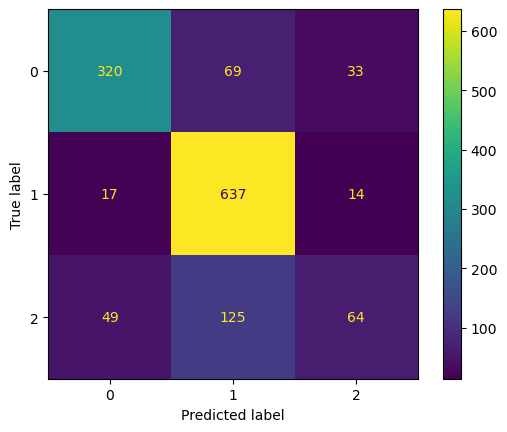

In [25]:
# Confusion matrix 
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### 2. Using decison Tree 

In [26]:
classifer = DecisionTreeClassifier()
classifer = classifer.fit(X_train,y_train)

In [27]:
y_pred = classifer.predict(X_test)

In [28]:
# Accuary of Decision Tree
accuracy_DT = classifer.score(X_test, y_pred)
print('Accuracy Score:', accuracy_DT)

Accuracy Score: 1.0


In [29]:
x_train_DT_pred = classifer.predict(X_train)

In [30]:
# Training Accuracy of Decision Tree 
training_DT_ac = accuracy_score(y_train, x_train_DT_pred)
print("Training Accuracy:", training_DT_ac)

Training Accuracy: 1.0


In [31]:
x_test_DT = classifer.predict(X_test)

In [32]:
# Testing Accuracy of Decision Tree 
testing_DT = accuracy_score(y_test, x_test_DT)
print("Testing Accuracy:", testing_DT)

Testing Accuracy: 0.6807228915662651


##### Optimizing Accuracy with GridSearchCV

In [33]:
# Paramters 
param_decisiontree = {'max_depth':[2,4,6,8], 
                      'min_samples_leaf':[2,4,6,8],
                      'min_samples_split':[2,5,10,12]}

In [34]:
grid_search = GridSearchCV(classifer, param_grid=param_decisiontree , cv=5, n_jobs=-1)

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 12]})

In [36]:
X_train_pred_DT = grid_search.predict(X_train)

In [37]:
# Training Accuracy after hyperparameter tuning 
training_accuracy_DT = accuracy_score(y_train, X_train_pred_DT)
print("The training accuracy after Hyperparameter Tuning:", training_accuracy_DT)

The training accuracy after Hyperparameter Tuning: 0.7548449612403101


In [38]:
X_test_pred_DT = grid_search.predict(X_test)

In [39]:
# Testing Accuracy after hyperparameter tuning 
testing_accuracy_DT =  accuracy_score(y_test, X_test_pred_DT)
print("The testing accuracy after Hyperparameter Tuning", testing_accuracy_DT)

The testing accuracy after Hyperparameter Tuning 0.7432228915662651


# Pickle file 

In [40]:
model = RandomForestClassifier().fit(X_train, y_train)

In [41]:
with open('predict_student_dropout_academic_success.pkl', 'wb') as f:
    pickle.dump(model, f)

# Feature importance 

In [42]:
# get importance 
importance = model.feature_importances_

In [43]:
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00389
Feature: 1, Score: 0.02200
Feature: 2, Score: 0.01510
Feature: 3, Score: 0.03513
Feature: 4, Score: 0.00278
Feature: 5, Score: 0.00665
Feature: 6, Score: 0.03734
Feature: 7, Score: 0.00173
Feature: 8, Score: 0.02121
Feature: 9, Score: 0.02253
Feature: 10, Score: 0.02603
Feature: 11, Score: 0.02959
Feature: 12, Score: 0.04313
Feature: 13, Score: 0.00796
Feature: 14, Score: 0.00115
Feature: 15, Score: 0.01141
Feature: 16, Score: 0.03951
Feature: 17, Score: 0.01015
Feature: 18, Score: 0.01529
Feature: 19, Score: 0.03753
Feature: 20, Score: 0.00108
Feature: 21, Score: 0.00708
Feature: 22, Score: 0.01892
Feature: 23, Score: 0.03541
Feature: 24, Score: 0.09077
Feature: 25, Score: 0.06440
Feature: 26, Score: 0.00558
Feature: 27, Score: 0.00637
Feature: 28, Score: 0.01919
Feature: 29, Score: 0.03762
Feature: 30, Score: 0.15526
Feature: 31, Score: 0.09217
Feature: 32, Score: 0.00519
Feature: 33, Score: 0.02189
Feature: 34, Score: 0.02147
Feature: 35, Score: 0.02406
Fe

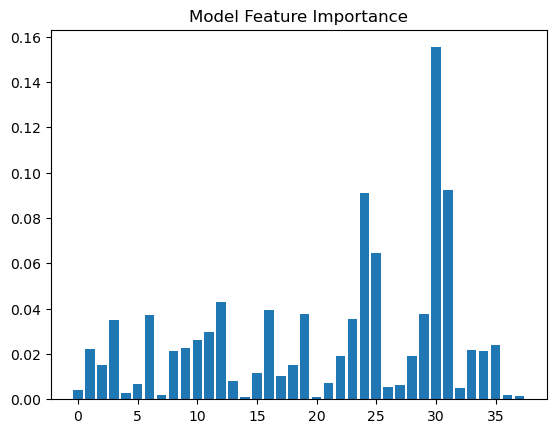

In [51]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Model Feature Importance')
plt.show()

In [52]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Summary 

The data was split by the 70:30 ratio. Initially, the Random Forest Classifier gave a testing accuracy rate of 78.5%. After optimizing using RandomizedSearchCV, the training accuracy was 84.6% and the test accuracy was 76.9%. Compared to the Random Forest Classifier, the Decision Tree produced a testing accuracy of 68.1%. After optimizing the result with GridSearchCV, the training accuracy was 75.5% and the test accuracy was 74.3%. Based on these results, the best model was the Random Forest Classifier after hyperparameter tuning.  

Based on the model, the feature with the most importance was feature 30, "Curricular units 2nd sem (approved)". Feature 24, " Curricular units 1st sem (approved)", and feature 31, "Curricular units 2nd sem (grade)", tied for second. Indicating semester grades are a major indicator of whether or not a student will graduate.   
